In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 762.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 944.1 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [72]:
df = pd.read_csv('D:/Pre Masters/1st Semester/Data Mining/archive (2)/spotify_songs.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [51]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

The average duration of a song in the dataset is 225799.811622 ms or 3 min and 45 sec

In [52]:
fig = go.Figure(data=[go.Pie(labels=['edm','rap','pop','r&b', 'latin', 'rock'], values=df['playlist_genre'].value_counts(), textinfo='label+percent', 
                             insidetextorientation='radial' )])
fig.show()

Genres of the playlists are mostly equally represented

In [53]:
import plotly.express as px

selected_columns = df[['track_popularity', 'danceability', 'energy', 'loudness', 'valence']]

fig = px.scatter_matrix(selected_columns, 
                        dimensions=['track_popularity', 'danceability', 'energy', 'loudness', 'valence'],
                        title='Pair Plot of Track Popularity, Danceability, Energy, Loudness, and Valence', height=800)

fig.show()


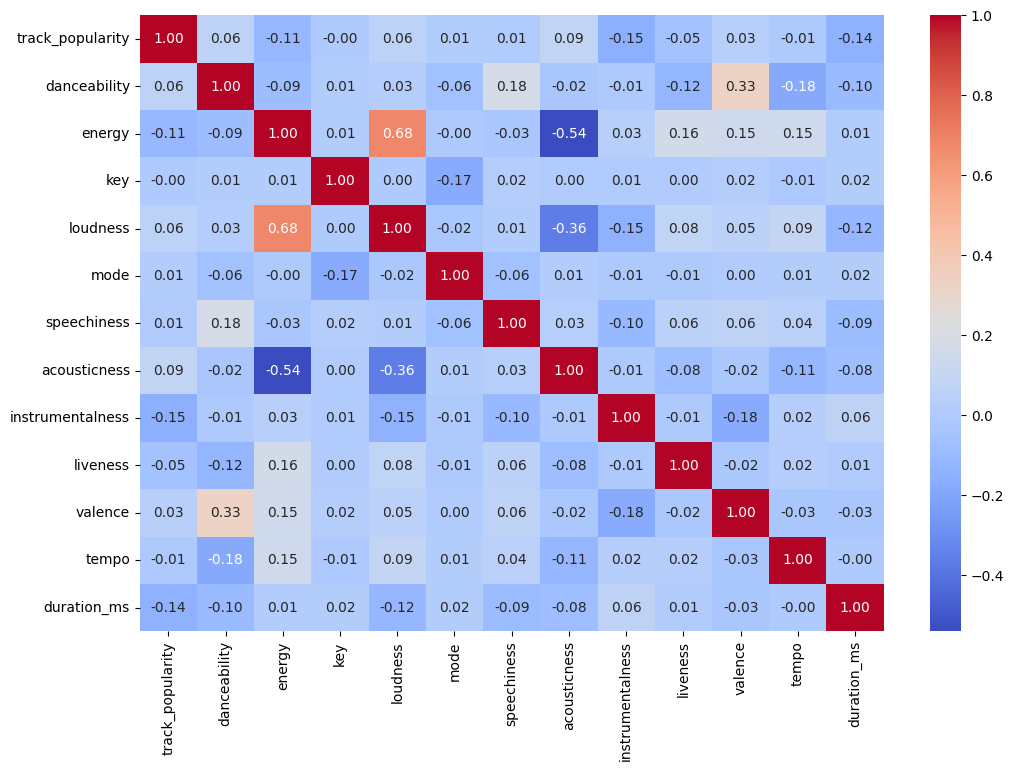

In [54]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [55]:
fig = px.box(df, x='playlist_genre', y='track_popularity', title='Box Plot of Track Popularity by Playlist Genre')
fig.update_layout(xaxis_title='Playlist Genre', yaxis_title='Track Popularity', xaxis_tickangle=45)
fig.show()

In [56]:
import plotly.express as px

# Calculate average popularity by genre
average_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Create the bar plot using Plotly
fig = px.bar(average_popularity_by_genre, x='playlist_genre', y='track_popularity', 
             title='Average Track Popularity by Genre', 
             labels={'playlist_genre': 'Genre', 'track_popularity': 'Average Track Popularity'},
             color='track_popularity', color_continuous_scale='viridis')

# Customize the layout to rotate the x-axis labels
fig.update_layout(xaxis_tickangle=45)

# Show the plot
fig.show()


Generally pop and latin tracks tend to be more popular
EDM tends to be the less popular genre

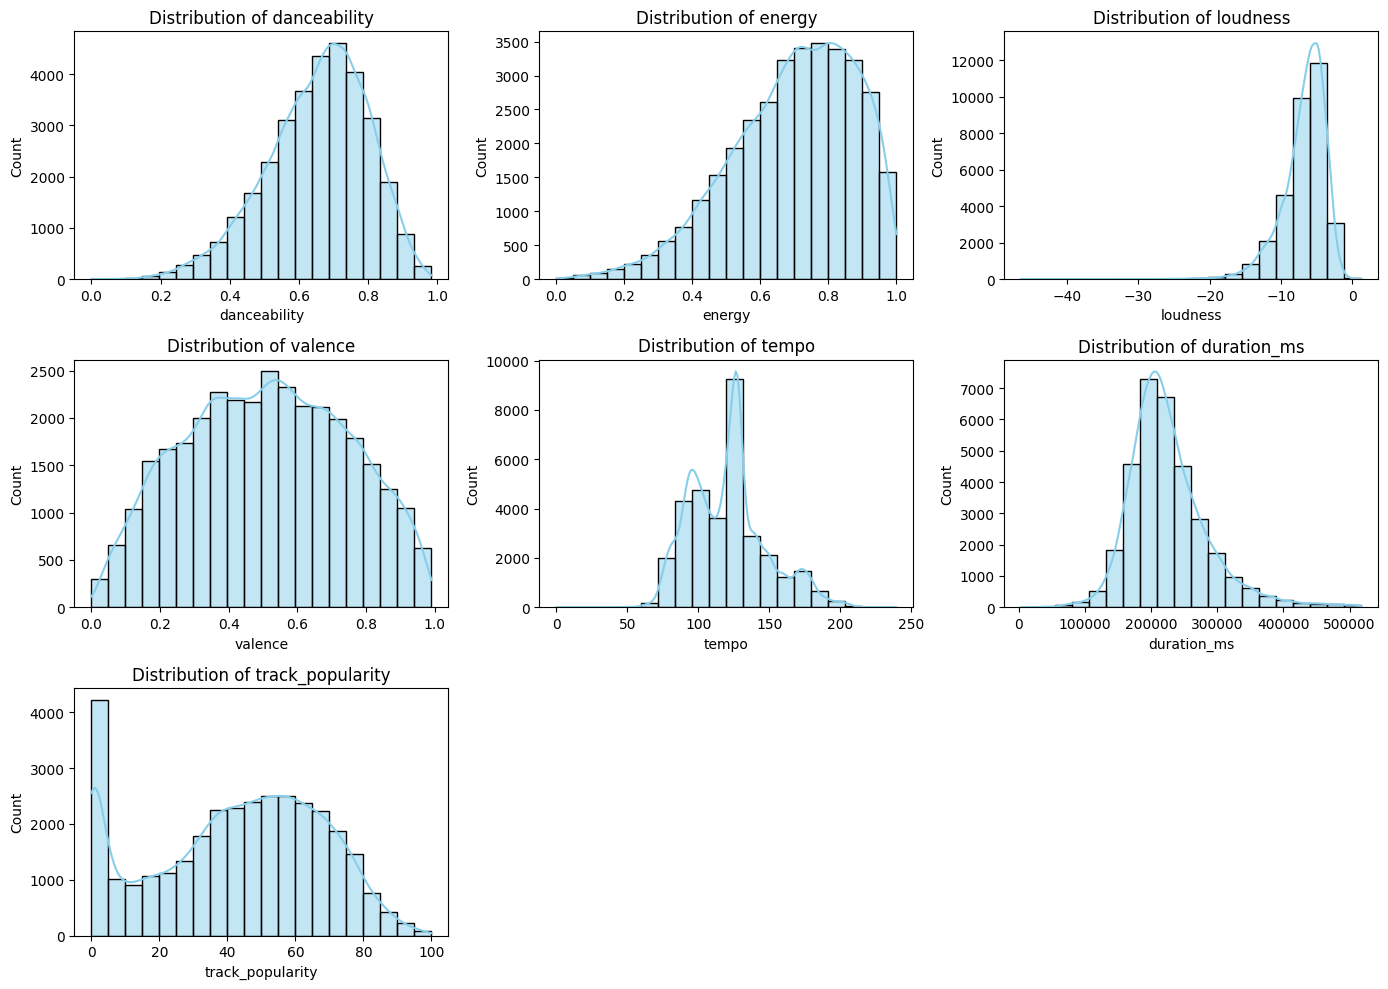

In [57]:
numeric_cols = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration_ms', 'track_popularity']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [58]:
df_copy = df.copy()
df_copy['track_album_release_date'] = pd.to_datetime(df_copy['track_album_release_date'], format='mixed')
df_copy['year'] =pd.DatetimeIndex(df_copy.track_album_release_date).year

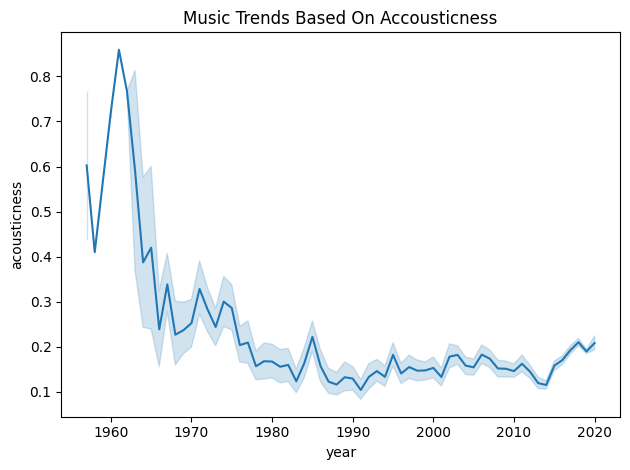

In [59]:
sns.lineplot(x='year', y='acousticness', data=df_copy)

plt.title("Music Trends Based On Accousticness")
plt.tight_layout()
plt.show()

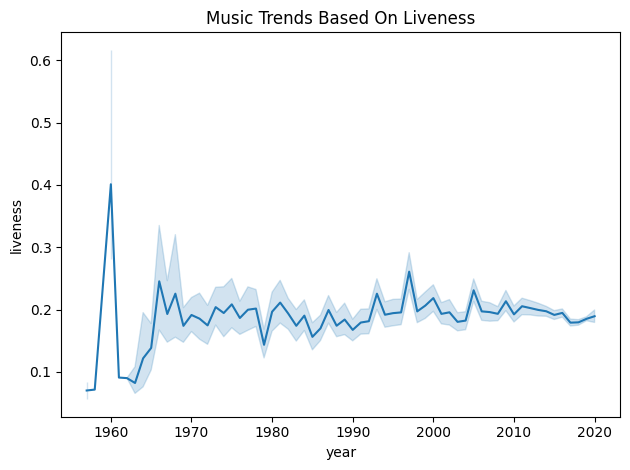

In [60]:
sns.lineplot(x='year', y='liveness', data=df_copy)

plt.title("Music Trends Based On Liveness")
plt.tight_layout()
plt.show()

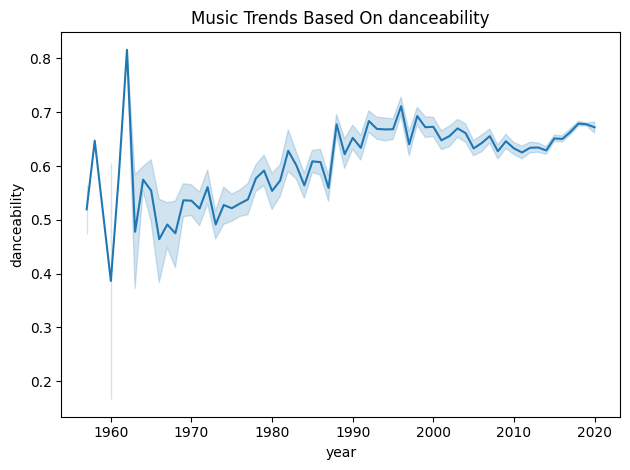

In [61]:
sns.lineplot(x='year', y='danceability', data=df_copy)

plt.title("Music Trends Based On danceability")
plt.tight_layout()
plt.show()

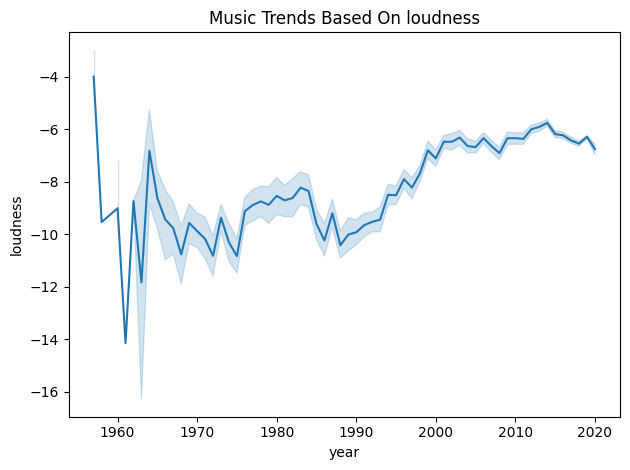

In [62]:
sns.lineplot(x='year', y='loudness', data=df_copy)

plt.title("Music Trends Based On loudness")
plt.tight_layout()
plt.show()

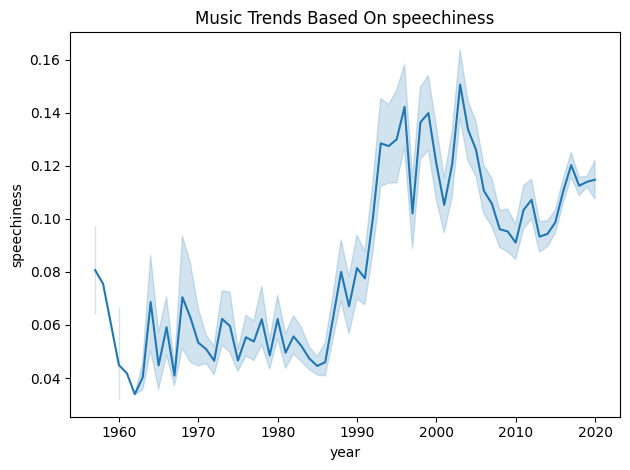

In [63]:
sns.lineplot(x='year', y='speechiness', data=df_copy)

plt.title("Music Trends Based On speechiness")
plt.tight_layout()
plt.show()

In [64]:
df['track_artist'].nunique()

10692

In [65]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [19]:
df['track_artist'].fillna('N/A', inplace=True)  # Fill missing values in a specific column
df['track_album_name'].fillna('N/A', inplace=True)  # Fill missing values in a specific column
df['track_name'].fillna('N/A', inplace=True)  # Fill missing values in a specific column

df.isnull().sum()

C:\Users\Amr Samir\AppData\Local\Temp\ipykernel_25036\4220503583.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Amr Samir\AppData\Local\Temp\ipykernel_25036\4220503583.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder class

all_columns = df.columns 

categorical_columns = all_columns.drop(['playlist_genre', 'track_popularity', 'danceability', 'energy', 
                                        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'])


le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [79]:
categorical_columns

Index(['track_id', 'track_name', 'track_artist', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_subgenre'],
      dtype='object')

In [80]:
import os

directory_path = 'D:/Pre Masters/1st Semester/Data Mining/archive (2)/'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Specify the file path
file_path = os.path.join(directory_path, 'output.csv')

# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")

Data saved to D:/Pre Masters/1st Semester/Data Mining/archive (2)/output.csv
